This model aims to identify the principle components involved in predicting the stock price of Coca cola from a set of time series variables

Data Courtesy: Yahoo Finance and FRED (Federal Reserve Bank of St. Louis)

Using the yfinance library to retrieve historical stock data for Coca-Cola (KO) and then resampling it to a quarterly frequency.

In [2]:
import yfinance as yf
from datetime import datetime

# Define the stock symbol (KO for Coca-Cola)
symbol = "KO"

# Create a Ticker object for Coca-Cola
ko = yf.Ticker(symbol)

# Define custom start date and end date
start_date = '2012-12-31'
end_date = datetime.today()

# Get daily data for the specified date range
data = ko.history(start=start_date, end=end_date, interval="3mo")

# Resample to quarterly frequency (end of quarter)
quarterly_data = data.resample('Q').last()

# Reset the index to make the 'Date' column a regular column
quarterly_data = quarterly_data.reset_index()

# Print the DataFrame with the 'Date' column
quarterly_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-12-31 00:00:00-05:00,26.386005,27.862594,26.050740,27.620062,627696600,0.00,0.0
1,2013-03-31 00:00:00-04:00,27.456003,30.979843,27.427469,28.525995,894424000,0.28,0.0
2,2013-06-30 00:00:00-04:00,28.703747,29.982662,27.158989,27.432016,863530400,0.28,0.0
3,2013-09-30 00:00:00-04:00,27.686739,29.574965,26.644960,29.075777,947889200,0.56,0.0
4,2013-12-31 00:00:00-05:00,29.426348,30.372982,27.070773,28.032084,975777300,0.00,0.0


 it will display the first few rows of the quarterly_data DataFrame containing the quarterly stock data for Coca-Cola.

In [3]:
quarterly_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-12-31 00:00:00-05:00,26.386005,27.862594,26.050740,27.620062,627696600,0.00,0.0
1,2013-03-31 00:00:00-04:00,27.456003,30.979843,27.427469,28.525995,894424000,0.28,0.0
2,2013-06-30 00:00:00-04:00,28.703747,29.982662,27.158989,27.432016,863530400,0.28,0.0
3,2013-09-30 00:00:00-04:00,27.686739,29.574965,26.644960,29.075777,947889200,0.56,0.0
4,2013-12-31 00:00:00-05:00,29.426348,30.372982,27.070773,28.032084,975777300,0.00,0.0


Using the to_csv method, you're exporting the quarterly_data DataFrame to a CSV file named coca_cola_time_series_data.csv

In [4]:
# export data to csv file
quarterly_data.to_csv('coca_cola_time_series_data.csv')

This code snippet fetches data for Consumer Spending from the FRED API and stores it in the consumer_spending DataFrame. If you run this code, you'll see the first few rows of the data.

In [5]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

# Define the series code for Consumer Spending (PCE)
series_code = 'PCE'

# Define the start and end dates for the past 10 years
# Define custom start date and end date
start_date = '2012-09-30'
end_date = datetime.today()

# Retrieve data from FRED API
consumer_spending = pdr.get_data_fred(series_code, start_date, end_date)

consumer_spending.head()

,PCE
DATE,
2012-10-01,11137.4
2012-11-01,11178.4
2012-12-01,11181.2
2013-01-01,11252.4
2013-02-01,11290.5


Fetches economic data from the FRED API for various indicators, resamples it to quarterly frequency, combines it into a single DataFrame, and then saves it to a CSV file.

In [6]:
import pandas_datareader as pdr
from datetime import datetime

# Define series codes and corresponding names
economic_data = [
    {'code': 'PCE', 'name': 'Consumer Spending'},
    {'code': 'GDPC1', 'name': 'GDP Growth'},
    {'code': 'CPIAUCNS', 'name': 'Inflation Rate'},
    {'code': 'GS10', 'name': 'Interest Rates'},
    {'code': 'UNRATE', 'name': 'Unemployment Rate'}
]

# Define the start and end dates for the past 10 years
start_date = '2012-09-30'
end_date = '2023-09-01'

# Initialize an empty DataFrame
combined_data = pd.DataFrame()

# Loop through the economic data list
for item in economic_data:
    # Retrieve data from FRED API
    data = pdr.get_data_fred(item['code'], start_date, end_date)
    
    # Resample data to quarterly frequency (taking the last value of each quarter)
    data = data.resample('Q').last()
    
    # Rename columns to include the economic indicator name
    data = data.rename(columns={'value': item['name']})
    
    # Merge data with existing combined_data DataFrame
    combined_data = pd.concat([combined_data, data], axis=1)

# Add the date column to the data
combined_data['Date'] = combined_data.index

combined_data.reset_index

# Save the combined data to a CSV file
combined_data.to_csv('economic_data_with_single_date_column_quarterly.csv', index=False)


Display Date column from quarterly_data

In [7]:
quarterly_data["Date"].head()

0   2012-12-31 00:00:00-05:00
1   2013-03-31 00:00:00-04:00
2   2013-06-30 00:00:00-04:00
3   2013-09-30 00:00:00-04:00
4   2013-12-31 00:00:00-05:00
Name: Date, dtype: datetime64[ns, America/New_York]

Using the apply method along with a lambda function to format the dates in the "Date" column of the quarterly_data DataFrame to a string format in the "mm-dd-yyyy" style.

In [8]:
quarterly_data['Date'] = quarterly_data['Date'].apply(lambda x: x.strftime("%m-%d-%Y"))

Display Date column from quarterly_data

In [9]:
quarterly_data["Date"].head()

0    12-31-2012
1    03-31-2013
2    06-30-2013
3    09-30-2013
4    12-31-2013
Name: Date, dtype: object

Using the apply method along with a lambda function to format the dates in the "Date" column of the combined_data DataFrame to a string format in the "mm-dd-yyyy" style.

In [10]:
combined_data['Date'] = combined_data['Date'].apply(lambda x: x.strftime("%m-%d-%Y"))

Display first five rows of combined_data

In [11]:
combined_data.head()

,PCE,GDPC1,CPIAUCNS,GS10,UNRATE,Date
DATE,,,,,,
2012-12-31,11181.2,17489.852,229.601,1.72,7.9,12-31-2012
2013-03-31,11290.1,17662.400,232.773,1.96,7.5,03-31-2013
2013-06-30,11344.4,17709.671,233.504,2.30,7.5,06-30-2013
2013-09-30,11445.9,17860.450,234.149,2.81,7.2,09-30-2013
2013-12-31,11593.2,18016.147,233.049,2.90,6.7,12-31-2013


Display first five rows of quarterly_data

In [12]:
quarterly_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,12-31-2012,26.386005,27.862594,26.050740,27.620062,627696600,0.00,0.0
1,03-31-2013,27.456003,30.979843,27.427469,28.525995,894424000,0.28,0.0
2,06-30-2013,28.703747,29.982662,27.158989,27.432016,863530400,0.28,0.0
3,09-30-2013,27.686739,29.574965,26.644960,29.075777,947889200,0.56,0.0
4,12-31-2013,29.426348,30.372982,27.070773,28.032084,975777300,0.00,0.0


merged two DataFrames (quarterly_data and combined_data) based on the "Date" column using an inner join.

In [30]:
merged_df = pd.merge(quarterly_data, combined_data, on="Date", how="inner")

# Print the merged DataFrame
merged_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,PCE,GDPC1,CPIAUCNS,GS10,UNRATE
0,12-31-2012,26.386005,27.862594,26.050740,27.620062,627696600,0.00,0.0,11181.2,17489.852,229.601,1.72,7.9
1,03-31-2013,27.456003,30.979843,27.427469,28.525995,894424000,0.28,0.0,11290.1,17662.400,232.773,1.96,7.5
2,06-30-2013,28.703747,29.982662,27.158989,27.432016,863530400,0.28,0.0,11344.4,17709.671,233.504,2.30,7.5
3,09-30-2013,27.686739,29.574965,26.644960,29.075777,947889200,0.56,0.0,11445.9,17860.450,234.149,2.81,7.2
4,12-31-2013,29.426348,30.372982,27.070773,28.032084,975777300,0.00,0.0,11593.2,18016.147,233.049,2.90,6.7


Dropping the following redundant columns from the merged_df

In [31]:
merged_df = merged_df.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])

Display the first five rows of merged_df

In [32]:
merged_df.head()

,Date,Close,PCE,GDPC1,CPIAUCNS,GS10,UNRATE
0,12-31-2012,27.620062,11181.2,17489.852,229.601,1.72,7.9
1,03-31-2013,28.525995,11290.1,17662.400,232.773,1.96,7.5
2,06-30-2013,27.432016,11344.4,17709.671,233.504,2.30,7.5
3,09-30-2013,29.075777,11445.9,17860.450,234.149,2.81,7.2
4,12-31-2013,28.032084,11593.2,18016.147,233.049,2.90,6.7


Export merged_df to .csv file

In [33]:
merged_df.to_csv("combined quarterly data for regression.csv")

This code performs Principal Component Analysis (PCA) on the standardized features ('PCE', 'GDPC1', 'CPIAUCNS', 'GS10', 'UNRATE') in the dataset. It then identifies the top contributing factors for the first and second principal components.

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming 'df' is your DataFrame containing the data
features = ['PCE', 'GDPC1', 'CPIAUCNS', 'GS10', 'UNRATE']
X = merged_df[features]

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)

# Get loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Identify top contributing factors for first and second principal components
top_factors_pc1 = features[np.argmax(np.abs(loadings[:,0]))]
top_factors_pc2 = features[np.argmax(np.abs(loadings[:,1]))]

print(f"Top contributing factor for PC1: {top_factors_pc1}")
print(f"Top contributing factor for PC2: {top_factors_pc2}")


Top contributing factor for PC1: PCE
Top contributing factor for PC2: GS10


The above code helps to understand which original features have the highest contribution to the principal components, providing insights into the underlying patterns in the data. In this case PCE and GS10 are the highest contributing factors

This code generates a scatter plot of the first two principal components, along with arrows indicating the variable loadings. 

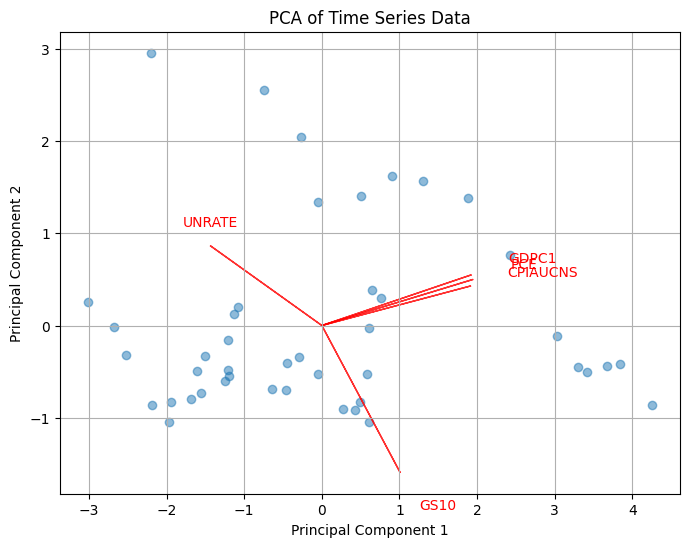

In [58]:
import matplotlib.pyplot as plt

# Assuming 'principal_components' contains the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Time Series Data')
plt.grid(True)

# Add arrows to indicate variable loadings
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0]*2, loadings[i, 1]*2, color='r', alpha=0.8)
    plt.text(loadings[i, 0]*2.5, loadings[i, 1]*2.5, feature, color='r')

plt.show()


The resulting plot will show a scatter of points representing the first two principal components. Arrows and labels indicate the variable loadings, providing insights into which original features contribute most to these components.

This code calculates and prints the explained variance for each principal component, as well as the cumulative explained variance.

In [61]:
# Calculate explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = explained_variance.cumsum()

# Create a DataFrame to display the results
contribution_df = pd.DataFrame({
    'Component': range(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

# Print the DataFrame
print(contribution_df)


   Component  Explained Variance  Cumulative Variance
0          1            0.694270             0.694270
1          2            0.196239             0.890509


By examining this DataFrame, you can gain insights into how much of the total variance is explained by each component and how much is accumulated as you consider more components. This information is valuable for deciding how many components to retain for further analysis.In this case it is two components PCE and GS10. Together they explain 89% variation in Close Price

Principal Component Analysis (PCA) is a widely used technique for dimensionality reduction and data compression. Here are some of its pros and cons:

Pros:

    1. Dimensionality Reduction: PCA reduces the number of variables in a dataset while retaining as much information as possible. This is particularly useful when dealing with high-dimensional data, as it can help improve model performance and reduce computational costs.

    2. Noise Reduction: PCA identifies the directions of maximum variance in the data, which often correspond to the most informative features. This can help filter out noise and irrelevant information.

    3. Multicollinearity Handling: PCA transforms correlated variables into uncorrelated variables (the principal components). This can be especially useful in scenarios where multicollinearity is present, as it can help improve the stability and interpretability of regression models.

    4. Interpretability: Although the principal components themselves may not have a direct interpretation in terms of the original features, they can provide insight into which combinations of features contribute most to the variance in the data.

    5. Visualization: PCA can be used for data visualization by projecting high-dimensional data onto a lower-dimensional space. This allows for easier exploration and understanding of the underlying patterns in the data.

Cons:

    1. Loss of Interpretability: While PCA provides a useful transformation for reducing dimensionality, the resulting principal components may not have a clear interpretation in terms of the original features. This can make it challenging to understand the meaning of the transformed data.

    2. Information Loss: PCA involves projecting data onto a lower-dimensional space, which can result in a loss of information. If some of the lower variance components are actually important for the analysis, they may be discarded.

    3. Assumption of Linearity: PCA assumes linear relationships between variables. In cases where relationships are highly non-linear, PCA may not capture the underlying structure effectively.

    4. Sensitivity to Scaling: PCA is sensitive to the scale of the variables. Therefore, it's important to standardize or normalize the data before applying PCA.

    5. Determining the Number of Components: Selecting the appropriate number of principal components can be challenging. It requires a trade-off between retaining enough information and reducing dimensionality.